In [12]:
# import the necessary packages
from os import listdir
from os.path import isfile, join
from skimage.metrics import normalized_root_mse as compare_nrmse
from skimage.metrics import structural_similarity as ssim
from sys import argv, exit, stderr
from os.path import dirname
import cv2
import cv2 as cv
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

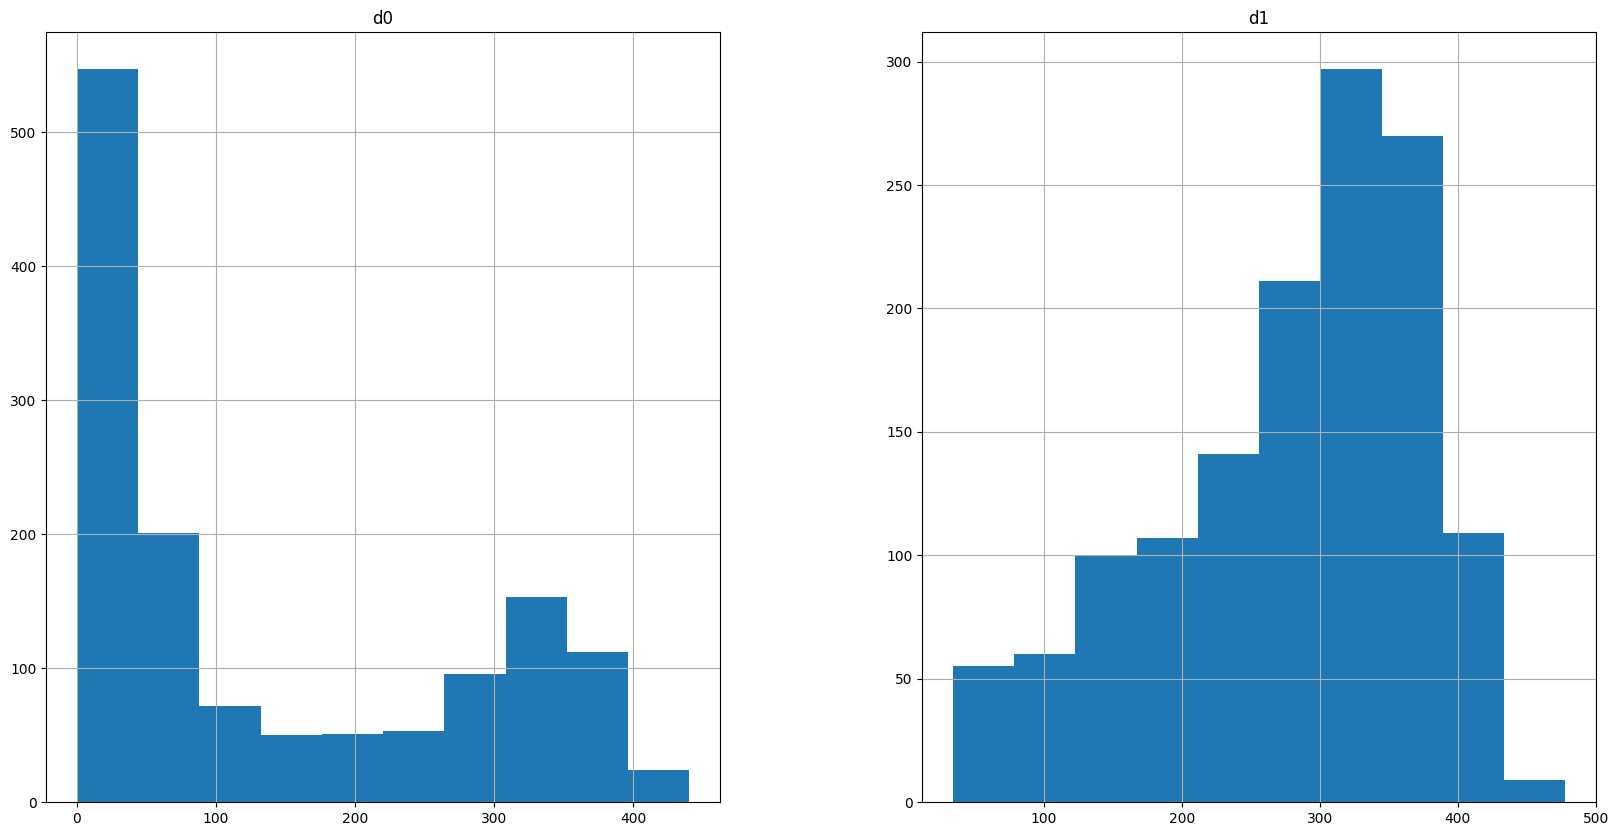

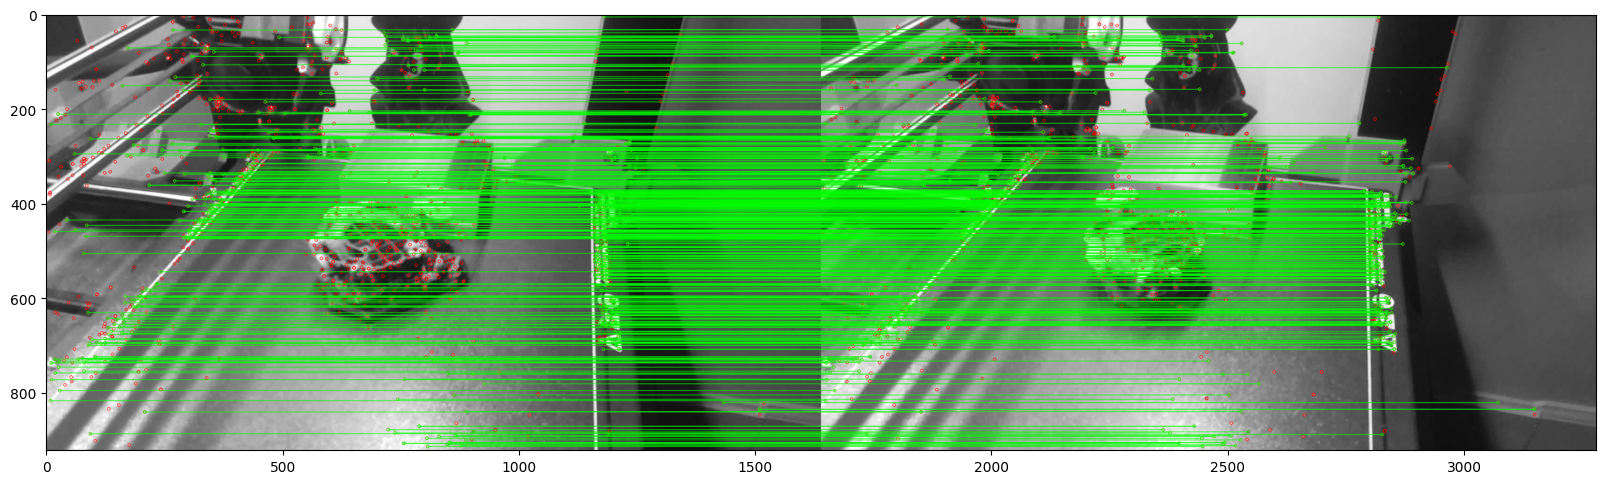

(<matplotlib.image.AxesImage at 0x1319728b0>, None)

In [2]:
# This is from frame #57 (right before failure) -> #58 (1st frame of failure)
# The SIFT matches quite well. Is it because #58 is essentially just a translation of #57?

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]

img1 = cv2.imread('./jpgs/FAILED_newcastlegate06_multi_test01_0.2mm_PLA_MK3SMMU2S_1d20h42m_20220502124240/frame000057.jpg',cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('./jpgs/FAILED_newcastlegate06_multi_test01_0.2mm_PLA_MK3SMMU2S_1d20h42m_20220502124240/frame000058.jpg',cv2.IMREAD_GRAYSCALE) # trainImage
sift = cv2.SIFT_create()
# # find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)   # or pass empty dictionary

flann = cv2.FlannBasedMatcher(index_params,search_params)
# matches = flann.match(des1,des2)
matches = flann.knnMatch(des1,des2,k=2)

df = pd.DataFrame({'d0': map(lambda x:x[0].distance, matches), 'd1': map(lambda x:x[1].distance, matches)})
df.hist()
plt.show()
# img1=cv2.drawKeypoints(img1,kp1,img1)
  
# plt.imshow(img1)
# plt.show()

# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]
# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.15*n.distance:
        matchesMask[i]=[1,0]
draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = cv2.DrawMatchesFlags_DEFAULT)
img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,matches,None,**draw_params)
plt.imshow(img3,),plt.show()


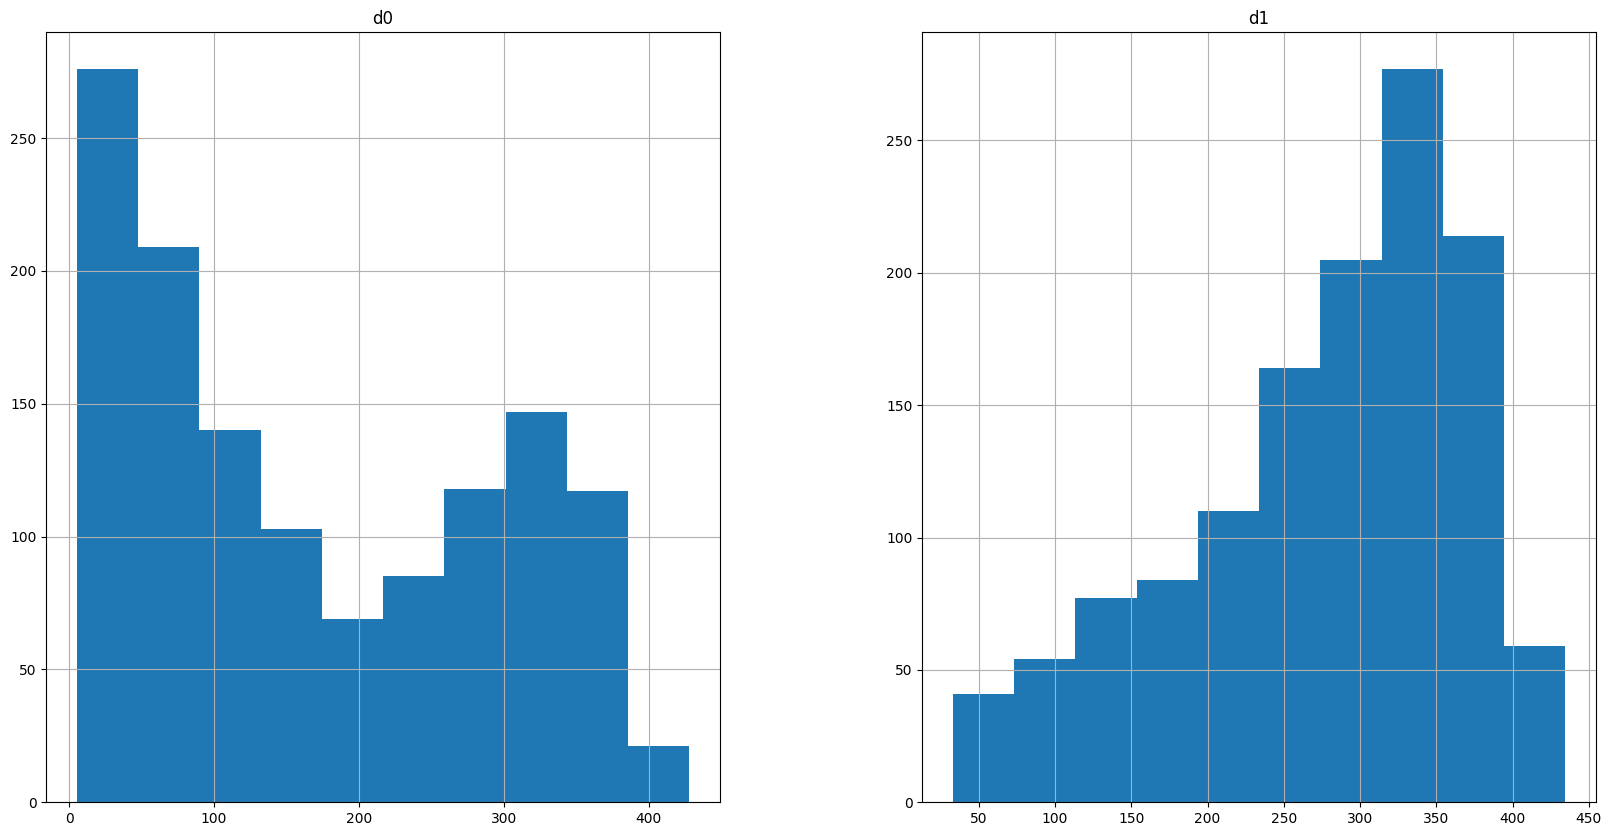

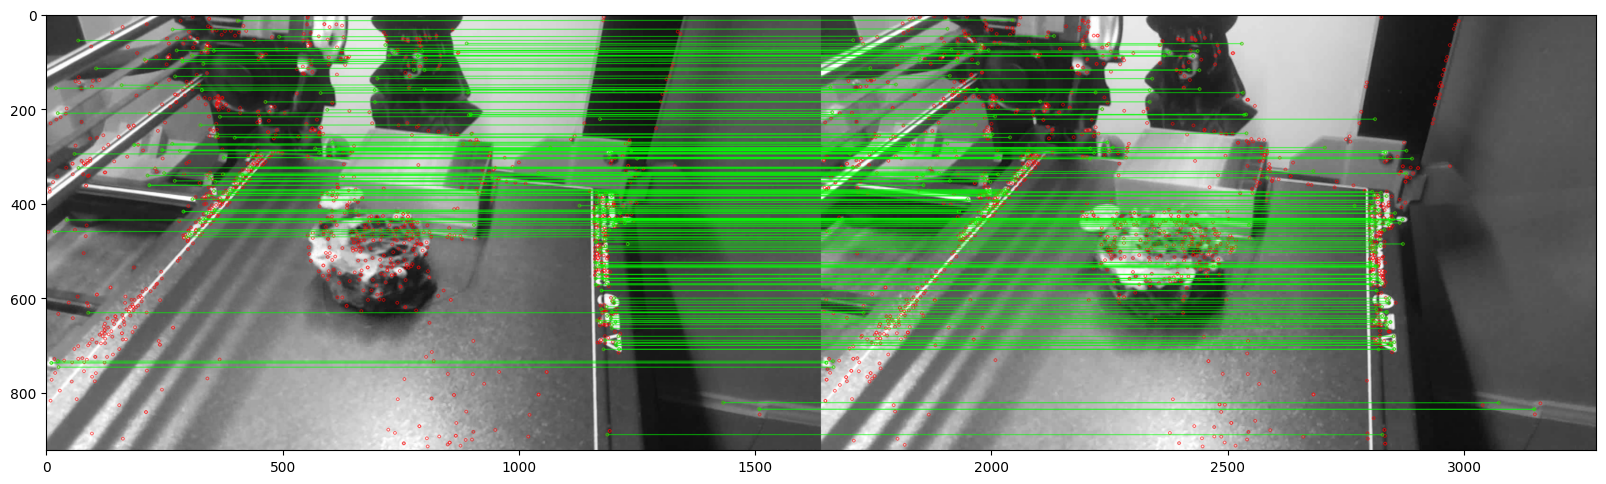

(<matplotlib.image.AxesImage at 0x12ebf9370>, None)

In [72]:
# This is from frame #58 (1st frame of failure) -> #59
# The SIFT doesn't match nearly as well as #57 -> #58. This is probably because of the spaghetti on #59

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]

img1 = cv2.imread('./jpgs/FAILED_newcastlegate06_multi_test01_0.2mm_PLA_MK3SMMU2S_1d20h42m_20220502124240/frame000058.jpg',cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('./jpgs/FAILED_newcastlegate06_multi_test01_0.2mm_PLA_MK3SMMU2S_1d20h42m_20220502124240/frame000059.jpg',cv2.IMREAD_GRAYSCALE) # trainImage
sift = cv2.SIFT_create()
# # find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)   # or pass empty dictionary

flann = cv2.FlannBasedMatcher(index_params,search_params)
# matches = flann.match(des1,des2)
matches = flann.knnMatch(des1,des2,k=2)

df = pd.DataFrame({'d0': map(lambda x:x[0].distance, matches), 'd1': map(lambda x:x[1].distance, matches)})
df.hist()
plt.show()
# img1=cv2.drawKeypoints(img1,kp1,img1)
  
# plt.imshow(img1)
# plt.show()

# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]
# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.15*n.distance:
        matchesMask[i]=[1,0]
draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = cv2.DrawMatchesFlags_DEFAULT)
img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,matches,None,**draw_params)
plt.imshow(img3,),plt.show()


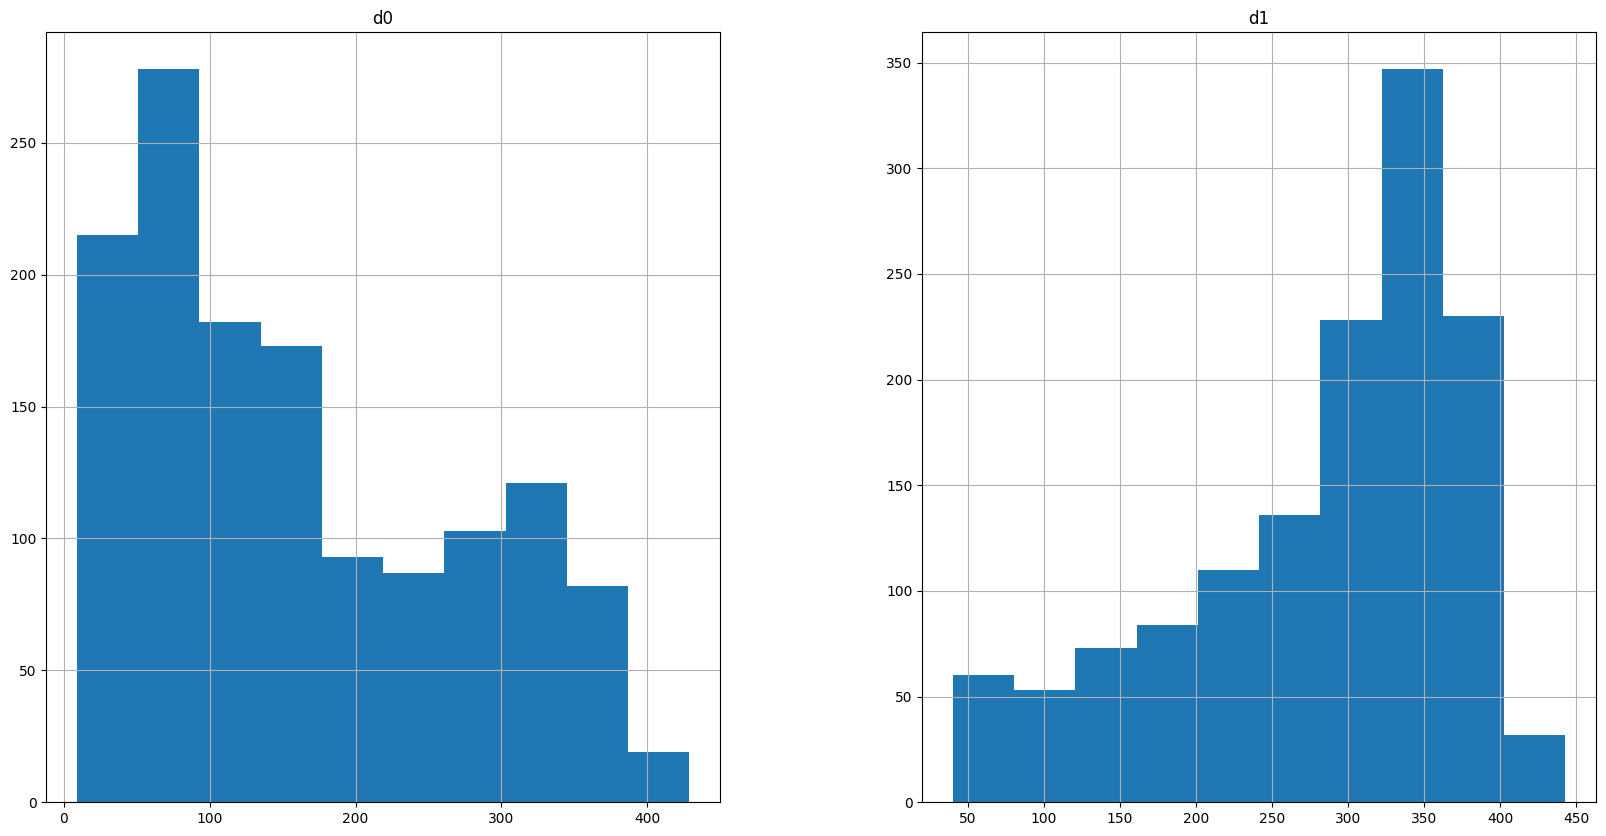

In [18]:
# This is from #43 -> #44 (bed shifted)
# Note that it matches worse than #57 -> #58 and #58 -> #59

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]

img1 = cv2.imread('./jpgs/FAILED_newcastlegate06_multi_test01_0.2mm_PLA_MK3SMMU2S_1d20h42m_20220502124240/frame000043.jpg',cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('./jpgs/FAILED_newcastlegate06_multi_test01_0.2mm_PLA_MK3SMMU2S_1d20h42m_20220502124240/frame000044.jpg',cv2.IMREAD_GRAYSCALE) # trainImage
sift = cv2.SIFT_create()
# # find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)   # or pass empty dictionary

flann = cv2.FlannBasedMatcher(index_params,search_params)
# matches = flann.match(des1,des2)
matches = flann.knnMatch(des1,des2,k=2)

df = pd.DataFrame({'d0': map(lambda x:x[0].distance, matches), 'd1': map(lambda x:x[1].distance, matches)})
df.hist()
plt.show()

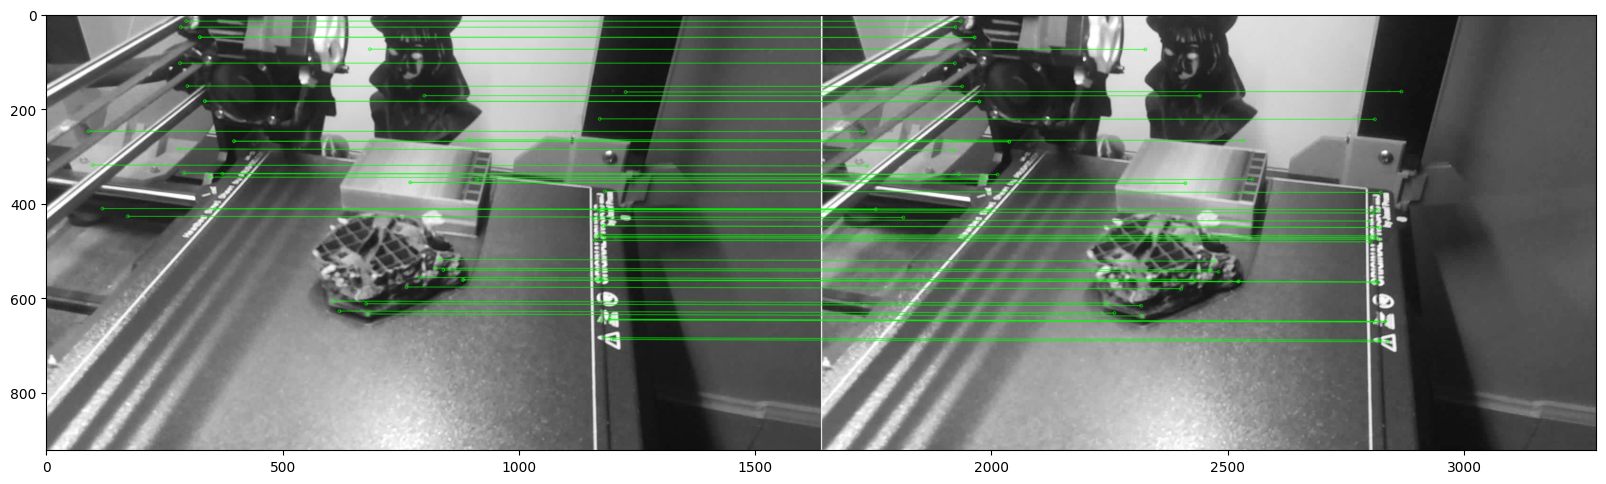

(<matplotlib.image.AxesImage at 0x1325b1d90>, None)

In [19]:
MIN_MATCH_COUNT = 10

good = []
for m,n in matches:
    if m.distance < 0.1*n.distance:
        good.append(m)

if len(good)>MIN_MATCH_COUNT:
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)
    M, mask = cv2.findHomography(src_pts, dst_pts, cv.RANSAC,5.0)
    matchesMask = mask.ravel().tolist()
    h,w = img1.shape
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv.perspectiveTransform(pts,M)
    img2 = cv.polylines(img2,[np.int32(dst)],True,255,3, cv.LINE_AA)
else:
    print( "Not enough matches are found - {}/{}".format(len(good), MIN_MATCH_COUNT) )
    matchesMask = None
    
draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                   singlePointColor = None,
                   matchesMask = matchesMask, # draw only inliers
                   flags = 2)
img3 = cv.drawMatches(img1,kp1,img2,kp2,good,None,**draw_params)
plt.imshow(img3, 'gray'),plt.show()

In [17]:
M

array([[ 1.00175328e+00,  1.27008902e-03, -9.53261637e-01],
       [ 4.41747240e-04,  1.00249192e+00, -9.91877096e-01],
       [ 6.48159965e-07,  1.44642915e-06,  1.00000000e+00]])

In [20]:
M

array([[ 9.98742992e-01, -1.55979677e-03, -1.32679994e-02],
       [-9.31220988e-04,  1.00473305e+00,  1.61602728e-01],
       [-2.37869480e-06, -1.69009094e-06,  1.00000000e+00]])

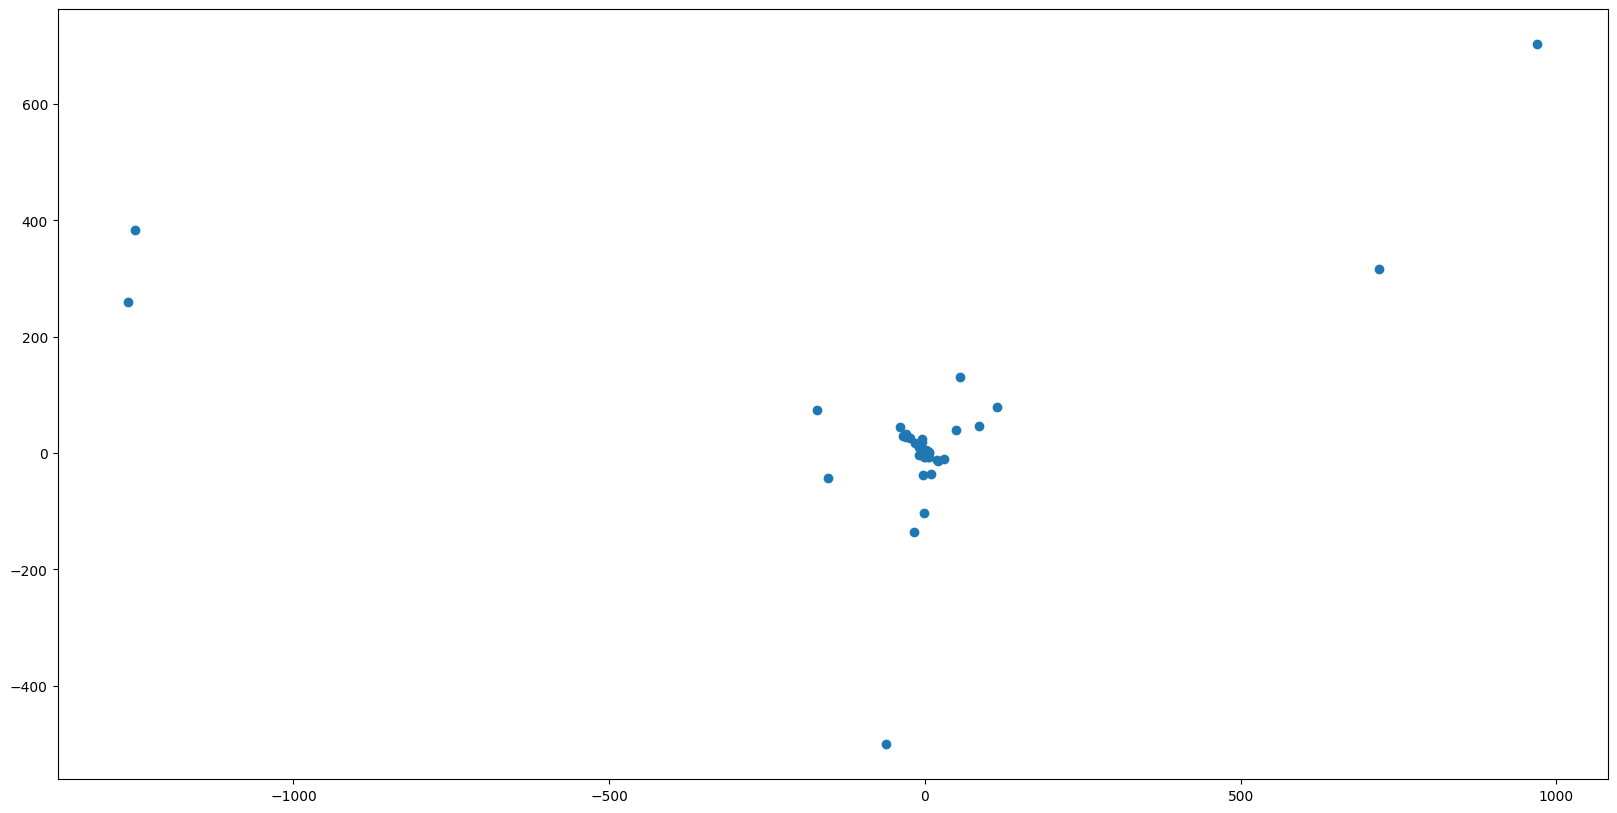

array([-1.00383231,  1.86451474])

In [6]:
matches = list(filter(lambda m: m[0].distance < 0.75*m[1].distance, matches))
queryIdx = [ m[0].queryIdx for m in matches ]
trainIdx = [ m[0].trainIdx for m in matches ]

queryPts = np.array([ [kp.pt[0], kp.pt[1]] for kp in kp1 ])[queryIdx]
trainPts = np.array([ [kp.pt[0], kp.pt[1]] for kp in kp2 ])[trainIdx]
diffPts = queryPts - trainPts
# f = lambda x: x[0] ** 2 + x[1] ** 2 < 2
# diffPts = diffPts[np.apply_along_axis(f, 1, diffPts)]
plt.scatter(diffPts[:, 0], diffPts[:, 1])
plt.show()
np.mean(diffPts, 0)

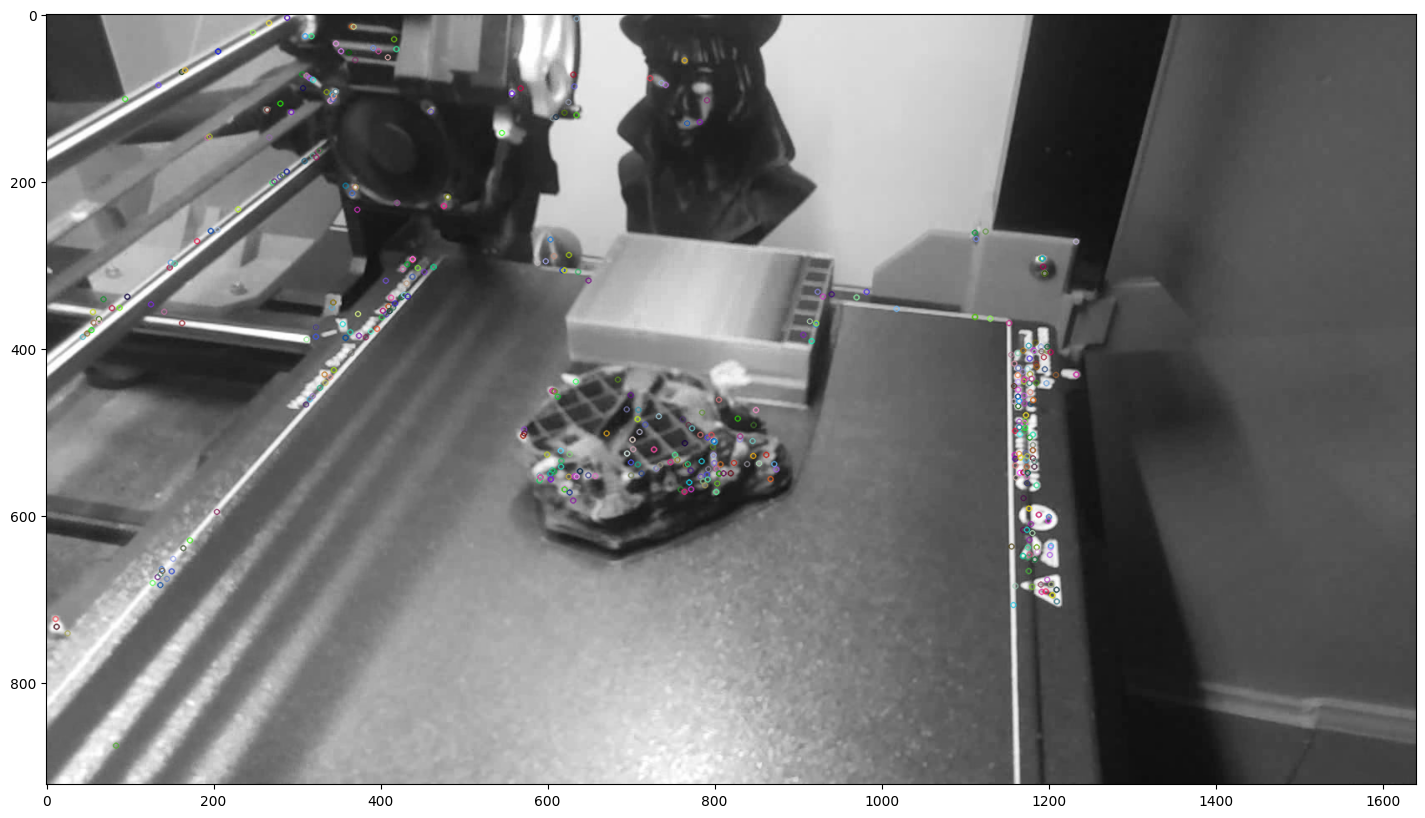

In [130]:
# Edge enchance before feature extraction. It resulted in fewer features. Not sure if it's a good thing or bad thing

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]

img1 = cv2.imread('./jpgs/FAILED_newcastlegate06_multi_test01_0.2mm_PLA_MK3SMMU2S_1d20h42m_20220502124240/frame000043.jpg',cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('./jpgs/FAILED_newcastlegate06_multi_test01_0.2mm_PLA_MK3SMMU2S_1d20h42m_20220502124240/frame000044.jpg',cv2.IMREAD_GRAYSCALE) # trainImage
sift = cv2.SIFT_create()

img_blur1 = cv2.GaussianBlur(img1, (3,3), 0)

# Canny Edge Detection
edges1 = cv2.Canny(image=cv2.GaussianBlur(img1, (3,3), 0), threshold1=100, threshold2=200) # Canny Edge Detection
edges2 = cv2.Canny(image=cv2.GaussianBlur(img2, (3,3), 0), threshold1=100, threshold2=200) # Canny Edge Detection

# # find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(edges1,None)
kp2, des2 = sift.detectAndCompute(edges2,None)

FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)   # or pass empty dictionary

flann = cv2.FlannBasedMatcher(index_params,search_params)
# matches = flann.match(des1,des2)
matches = flann.knnMatch(des1,des2,k=2)

img1=cv2.drawKeypoints(img1,kp1,img1)
  
plt.imshow(img1)
plt.show()